In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
import os
os.chdir('C:\\Users\\sayas\\OneDrive\\New folder\\python projects')

In [3]:
# Load the dataset
data = pd.read_csv('wine.csv')

In [4]:
# Encode categorical variables
categorical_features = ['quality']
numeric_features = [col for col in data.columns if col not in categorical_features + ['left']]

In [5]:
# Preprocessing for numerical data
numeric_transformer = SimpleImputer(strategy='median')

In [6]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [7]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [8]:
# Split the data into training and testing sets
import pandas as pd
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual data loading method)
data = pd.read_csv('wine.csv')

# Check the column names in your DataFrame
print(data.columns)

# Ensure 'left' column exists in your DataFrame
if 'left' in data.columns:
    # Split the data into training and testing sets
    X = data.drop('left', axis=1)
    y = data['left']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [9]:
# Logistic Regression
logit = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logit = LogisticRegression()

# Fit the model
logit.fit(X_train, y_train)

# Make predictions
logit_pred = logit.predict(X_test)

# Predict probabilities
logit_pred_proba = logit.predict_proba(X_test)[:, 1]

# Example usage of predictions and probabilities
print("Predictions:", logit_pred[:5])  # Print first 5 predictions
print("Probabilities:", logit_pred_proba[:5])  # Print first 5 predicted probabilities


Predictions: [0 1 0 1 0]
Probabilities: [0.2213977  0.96808874 0.35784756 0.9252606  0.02459104]


In [11]:
# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logit_pred))

Logistic Regression Confusion Matrix:
[[75 14]
 [20 91]]


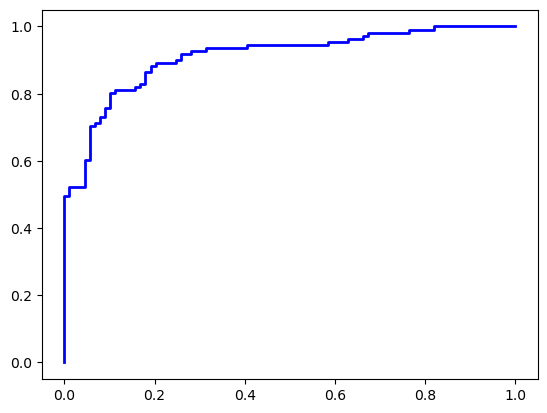

In [12]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logit_pred_proba)
roc_auc = roc_auc_score(y_test, logit_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)

In [13]:
# Decision Tree
tree = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', DecisionTreeClassifier(random_state=123))])

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
tree = DecisionTreeClassifier()

# Fit the model
tree.fit(X_train, y_train)

# Make predictions
tree_pred = tree.predict(X_test)

# Predict probabilities
tree_pred_proba = tree.predict_proba(X_test)[:, 1]

# Example usage of predictions and probabilities
print("Predictions:", tree_pred[:5])  # Print first 5 predictions
print("Probabilities:", tree_pred_proba[:5])  # Print first 5 predicted probabilities


Predictions: [0 1 0 1 0]
Probabilities: [0. 1. 0. 1. 0.]


In [15]:
# Confusion Matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, tree_pred))


Decision Tree Confusion Matrix:
[[73 16]
 [17 94]]


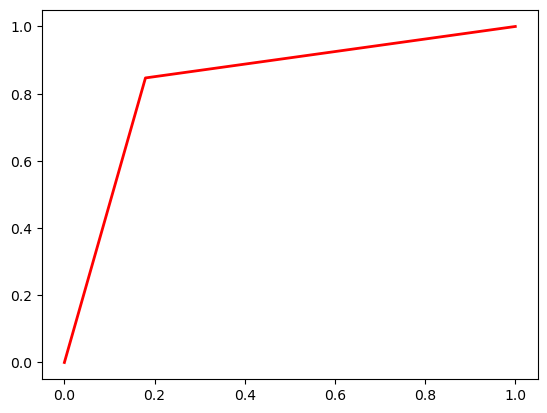

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, tree_pred_proba)
roc_auc = roc_auc_score(y_test, tree_pred_proba)
plt.plot(fpr, tpr, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


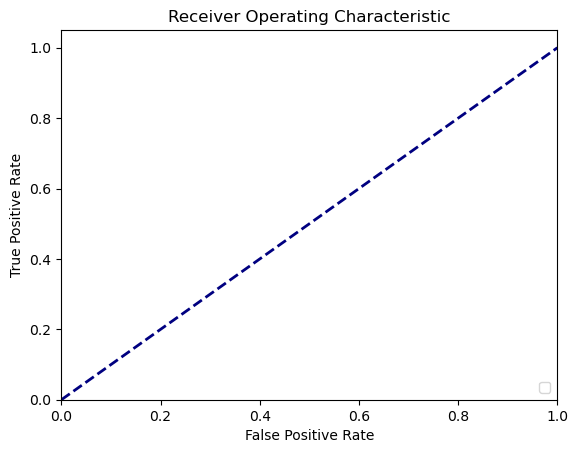

In [17]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()